In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("E:\AI\Mechanical ML\class 04\Dhaka Rent.csv",sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [12]:
#area is independent feature ,x
#rent is dependent feature,y
x=df['area']
y=df['rent']

In [13]:
x.head()
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [26]:
df.shape

(60, 2)

In [14]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [15]:
mean_x

2289.0

In [16]:
mean_y

37269.166666666664

In [17]:
df.area.mean()

2289.0

In [18]:
#Calculate Deviation

dev_x=x-mean_x
dev_y=y-mean_y

In [19]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

In [21]:
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [22]:
#Slope

m=np.sum(dev_x*dev_y)/np.sum(dev_x**2)

In [23]:
m

21.292661473611954

In [27]:
df.tail(1)

,area,rent
59,3100,51600


In [28]:
#intercept

c=mean_y-m*mean_x

In [29]:
c

-11469.7354464311

In [30]:
print(f"Slope(m) : {m}")
print(f"Intercept(c) : {c}")

Slope(m) : 21.292661473611954
Intercept(c) : -11469.7354464311


In [34]:
new_x=float(input("Enter any value of Area:"))
pred1=m*new_x+ c
print('Predicted rent is : {rent}'.format(rent=pred1))

Enter any value of Area: 2000


Predicted rent is : 31115.58750079281


SK Learn

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg=LinearRegression()

In [41]:
reg.fit(df[['area']],y)

LinearRegression()

In [43]:
reg.coef_

array([21.29266147])

In [48]:
m

21.292661473611954

In [45]:
reg.intercept_

-11469.735446431114

In [47]:
c

-11469.7354464311

In [49]:
reg.predict([[2000]])

array([31115.58750079])

In [50]:
pred1

31115.58750079281

Text(0.5, 1.0, 'Area -Rent Visualization')

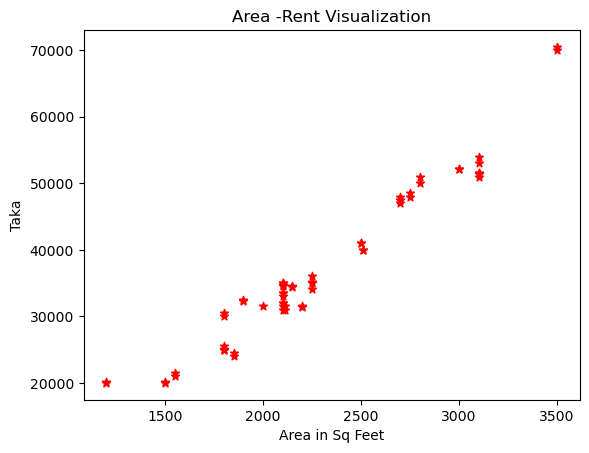

In [62]:
plt.scatter(x,y ,color='red',marker='*')  #2D Plot

plt.xlabel('Area in Sq Feet')
plt.ylabel('Taka')
plt.title("Area -Rent Visualization")

Data Split

In [63]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [64]:
from sklearn.model_selection import train_test_split

In [86]:
x=df.drop('rent',axis=1) #df[['area']] this also can be used 
y=df[['rent']]
x.head()


,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [87]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [88]:
xtrain,xtest,ytrain ,ytest=train_test_split(x,y,test_size=0.30)

In [89]:
xtrain.head() #70% Data Taken for Training

,area
50,2110
6,1500
54,2800
11,2100
27,1800


In [90]:
ytrain.head()

,rent
50,31000
6,20000
54,51000
11,32000
27,25000


In [91]:
xtest.head()

,area
14,2250
21,2100
17,1550
16,1800
10,2150


In [93]:
xtest.shape

(18, 1)

In [79]:
xtrain.shape

(42, 1)

In [94]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [95]:
reg.predict(xtest)

array([[36116.26464379],
       [32805.06141133],
       [20663.9828923 ],
       [26182.65494641],
       [33908.79582215],
       [35012.53023297],
       [46049.87434117],
       [36116.26464379],
       [32805.06141133],
       [32805.06141133],
       [32805.06141133],
       [41855.68358005],
       [12937.84201656],
       [28390.12376805],
       [52672.28080609],
       [27286.38935723],
       [26182.65494641],
       [32805.06141133]])

In [9]:
ytest.head()

NameError: name 'ytest' is not defined

In [97]:
ytest['predicted_y']=reg.predict(xtest)

In [99]:
ytest.head()

,rent,predicted_y
14,34100,36116.264644
21,33500,32805.061411
17,21000,20663.982892
16,30500,26182.654946
10,34500,33908.795822


In [8]:
ytest.drop('predicted_y',axis=1,inplace=True)

NameError: name 'ytest' is not defined

In [104]:
ytest.head()

,rent
14,34100
21,33500
17,21000
16,30500
10,34500


In [105]:
#Training Score

reg.score(xtrain,ytrain)

0.9595536225794242

In [107]:
#Testing Accuracy
reg.score(xtest,ytest)

0.8590789612303545

In [6]:
#MSE & MAE

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [7]:
mse=mean_squared_error(ytest,reg.predict(xtest))
mse

NameError: name 'ytest' is not defined

In [112]:
mae=mean_absolute_error(ytest,reg.predict(xtest))
mae

2223.232081902065

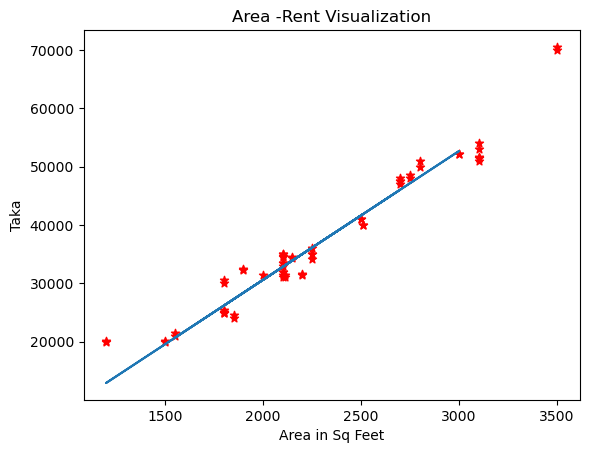

In [114]:
plt.scatter(x,y ,color='red',marker='*')  #2D Plot

plt.xlabel('Area in Sq Feet')
plt.ylabel('Taka')
plt.title("Area -Rent Visualization")

plt.plot(xtest,reg.predict(xtest))